In [49]:
import boto3
import datetime
import pandas as pd
import numpy as np

In [120]:
client = boto3.client('ec2')

In [110]:
spotprices = client.describe_spot_price_history(InstanceTypes=['c4.2xlarge','p2.xlarge'],
                                                StartTime=datetime.datetime.today()-datetime.timedelta(0.5),
                                                EndTime=datetime.datetime.today()
                                               )['SpotPriceHistory']

In [111]:
set([x.get('AvailabilityZone') for x in spotprices])

{'us-east-2a', 'us-east-2b', 'us-east-2c'}

In [112]:
prices = pd.DataFrame.from_records([(x.get('Timestamp'),x.get('InstanceType'),x.get('SpotPrice')) for x in spotprices])

In [113]:
prices.dtypes

0    datetime64[ns, UTC]
1                 object
2                 object
dtype: object

In [114]:
prices[2] = prices[2].astype(float)

In [115]:
prices[4] = prices[0].apply(lambda x: x.date())

In [119]:
prices.pivot_table(index=4, columns=1, values=2, aggfunc='median')

1,c4.2xlarge,p2.xlarge
4,,
2017-05-24,0.0494,0.126


In [106]:
%matplotlib inline

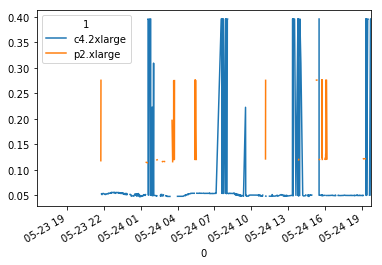

In [107]:
prices.pivot_table(index=0, columns=1, values=2, aggfunc='mean').plot()

In [96]:
spot_specs = {"ImageID":"ami-4191b524",
             "InstanceType":"t2.micro",
             "Placement":{"AvailabilityZone":"us-east-2"}}

In [ ]:
#spot
response = client.request_spot_instances(SpotPrice = ,
                                       LaunchSpecification = )

In [131]:
#key pair
response = client.run_instances(ImageId="ami-86277de3",
                                InstanceType="t2.micro",
                                MinCount=1,
                                MaxCount=1,
                                KeyName='dcld'
                               )

In [ ]:
client.describe_instances()

In [132]:
response = client.terminate_instances(InstanceIds=[response.get('Instances')[0].get('InstanceId')])